In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import re

### Extract the crowdfunding.xlsx Data

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [4]:

# Get the crowdfunding_info_df columns.
cf_columns = crowdfunding_info_df.columns.to_list()
print(cf_columns)


['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged', 'outcome', 'backers_count', 'country', 'currency', 'launched_at', 'deadline', 'staff_pick', 'spotlight', 'category & sub-category']


In [5]:
# Assign the category and subcategory values to category and subcategory columns.
cat_sub_lst = crowdfunding_info_df['category & sub-category'].tolist()

category=[]
sub_category=[]

for each in cat_sub_lst:
    items = re.split('/', each) 
    if len(items) > 0:
       category.append(items[0])
    if len(items) > 1: 
       sub_category.append(items[1]) 

crowdfunding_info_df['category'] = category
crowdfunding_info_df['subcategory'] = sub_category

crowdfunding_info_df

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock,music,indie rock


In [6]:
# Get the unique categories and subcategories in separate lists.
crowdfunding_info_df.columns

categories = crowdfunding_info_df['category'].unique().tolist()
subcategories = crowdfunding_info_df['subcategory'].unique().tolist()

print(categories)
print(subcategories)

['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']
['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [7]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [8]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = ["cat"+str(each) for each in category_ids]
# Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids = ["subcat"+str(each) for each in subcategory_ids]
    
print(cat_ids)
print(scat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [10]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
data_dict = {"category_id" : cat_ids, "category": categories}
category_df = pd.DataFrame(data_dict)
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
data_dict = {"subcategory_id" : scat_ids, "subcategory": subcategories}
subcategory_df = pd.DataFrame(data_dict)

In [11]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [12]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [13]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [14]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [15]:
# Rename the blurb, launched_at, and deadline columns.
column_mapping = {
    'blurb': 'description',
    'launched_at': 'launch_date',
    'deadline': 'end_date'
}
campaign_df.rename(columns=column_mapping, inplace=True)
campaign_df.columns

Index(['cf_id', 'contact_id', 'company_name', 'description', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launch_date',
       'end_date', 'staff_pick', 'spotlight', 'category & sub-category',
       'category', 'subcategory'],
      dtype='object')

In [16]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)
campaign_df['pledged'] = campaign_df['pledged'].astype(float)

campaign_df


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock,music,indie rock


In [17]:
# Check the datatypes
campaign_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cf_id                    1000 non-null   int64  
 1   contact_id               1000 non-null   int64  
 2   company_name             1000 non-null   object 
 3   description              1000 non-null   object 
 4   goal                     1000 non-null   float64
 5   pledged                  1000 non-null   float64
 6   outcome                  1000 non-null   object 
 7   backers_count            1000 non-null   int64  
 8   country                  1000 non-null   object 
 9   currency                 1000 non-null   object 
 10  launch_date              1000 non-null   int64  
 11  end_date                 1000 non-null   int64  
 12  staff_pick               1000 non-null   bool   
 13  spotlight                1000 non-null   bool   
 14  category & sub-category  

In [18]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
campaign_df['launch_date'] = pd.to_datetime(campaign_df['launch_date'], unit='s').dt.date
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'], unit='s').dt.date

campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock


In [19]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.

campaign_merged_df = campaign_df.merge(category_df, on='category')
campaign_merged_df = campaign_merged_df.merge(subcategory_df, on='subcategory')

campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09,2021-06-18,False,True,film & video/drama,film & video,drama,cat5,subcat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09,2021-05-26,False,True,music/rock,music,rock,cat2,subcat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14,2021-02-09,False,True,film & video/drama,film & video,drama,cat5,subcat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03,2021-07-08,False,True,photography/photography books,photography,photography books,cat8,subcat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15,2021-12-07,False,True,publishing/translations,publishing,translations,cat6,subcat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock,cat2,subcat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30,2021-08-18,False,False,food/food trucks,food,food trucks,cat1,subcat1


In [20]:
# Drop unwanted columns
campaign_cleaned = campaign_merged_df.drop(columns=['category & sub-category','category','subcategory','staff_pick','spotlight'])
campaign_cleaned

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,cat2,subcat8


In [21]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

<Axes: >

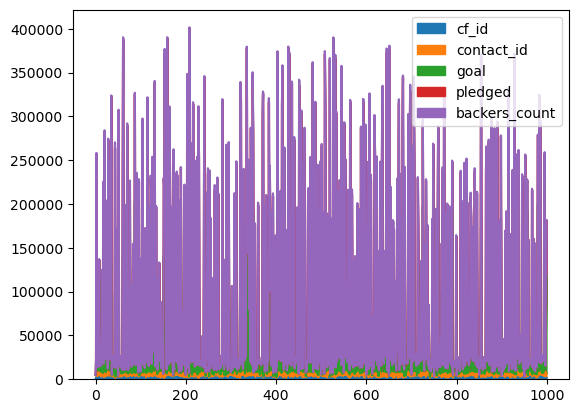

In [22]:
campaign_cleaned.plot(kind='area')

### Extract the contacts.xlsx Data.

In [23]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=2)
contact_info_df.head()
# Make the first row as the column label
contact_info_df.columns = contact_info_df.iloc[0]
# Save rest of the contents from Row 1 to the DF
contact_info_df = contact_info_df[1:]
contact_info_df

,contact_info
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"
...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}"
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}"
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}"
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [24]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json
dict_values = []

dict_values = [json.loads(each) for each in contact_info_df['contact_info']]

# Print out the list of values for each row.
print(dict_values)

[{'contact_id': 4661, 'name': 'Cecilia Velasco', 'email': 'cecilia.velasco@rodrigues.fr'}, {'contact_id': 3765, 'name': 'Mariana Ellis', 'email': 'mariana.ellis@rossi.org'}, {'contact_id': 4187, 'name': 'Sofie Woods', 'email': 'sofie.woods@riviere.com'}, {'contact_id': 4941, 'name': 'Jeanette Iannotti', 'email': 'jeanette.iannotti@yahoo.com'}, {'contact_id': 2199, 'name': 'Samuel Sorgatz', 'email': 'samuel.sorgatz@gmail.com'}, {'contact_id': 5650, 'name': 'Socorro Luna', 'email': 'socorro.luna@hotmail.com'}, {'contact_id': 5889, 'name': 'Carolina Murray', 'email': 'carolina.murray@knight.com'}, {'contact_id': 4842, 'name': 'Kayla Moon', 'email': 'kayla.moon@yahoo.de'}, {'contact_id': 3280, 'name': 'Ariadna Geisel', 'email': 'ariadna.geisel@rangel.com'}, {'contact_id': 5468, 'name': 'Danielle Ladeck', 'email': 'danielle.ladeck@scalfaro.net'}, {'contact_id': 3064, 'name': 'Tatiana Thompson', 'email': 'tatiana.thompson@hunt.net'}, {'contact_id': 4904, 'name': 'Caleb Benavides', 'email': '

In [25]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
new_contact_info_df = pd.DataFrame(dict_values)
new_contact_info_df

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...
995,3684,Whitney Noack,whitney.noack@laboratorios.org
996,5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
997,1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
998,6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [26]:
# Check the datatypes.
new_contact_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   name        1000 non-null   object
 2   email       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [27]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
print(len(new_contact_info_df))
new_contact_info_df= new_contact_info_df.dropna()
print(len(new_contact_info_df))

new_contact_info_df[['first_name','last_name']] = new_contact_info_df['name'].str.split(' ',n=1, expand=True)   

# Drop the contact_name column
new_contact_info_df = new_contact_info_df.drop(columns=['name'])
new_contact_info_df

1000
1000


,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz
...,...,...,...,...
995,3684,whitney.noack@laboratorios.org,Whitney,Noack
996,5784,gelsomina.migliaccio@junk.com,Gelsomina,Migliaccio
997,1498,evangelista.pereira@thompson-peterson.biz,Evangelista,Pereira
998,6073,gareth.comolli@tiscali.fr,Gareth,Comolli


In [28]:
new_contact_info_df_reordered = new_contact_info_df.iloc[:, [0, 2, 3,1]]
new_contact_info_df_reordered

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...,...
995,3684,Whitney,Noack,whitney.noack@laboratorios.org
996,5784,Gelsomina,Migliaccio,gelsomina.migliaccio@junk.com
997,1498,Evangelista,Pereira,evangelista.pereira@thompson-peterson.biz
998,6073,Gareth,Comolli,gareth.comolli@tiscali.fr


In [29]:
# Check the datatypes one more time before exporting as CSV file.
new_contact_info_df_reordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [30]:
# Export the DataFrame as a CSV file. 
new_contact_info_df_reordered.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [31]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

,contact_info
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [32]:
# Extract the four-digit contact ID number.
contact_info_df_copy['contact_id'] = contact_info_df_copy['contact_info'].str.extract(r'"contact_id": (\d+)')
contact_info_df_copy

,contact_info,contact_id
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199
...,...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073


In [33]:
# Check the datatypes.
contact_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   contact_info  1000 non-null   object
 1   contact_id    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [34]:
# Convert the "contact_id" column to an int64 data type.
contact_info_df_copy['contact_id'] = contact_info_df_copy['contact_id'].astype(int)
contact_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   contact_info  1000 non-null   object
 1   contact_id    1000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 11.8+ KB


In [35]:
# Extract the name of the contact and add it to a new column.
contact_info_df_copy['name'] = contact_info_df_copy['contact_info'].str.extract(r'"name": "([^"]+)"')
contact_info_df_copy

,contact_info,contact_id,name
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz
...,...,...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684,Whitney Noack
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784,Gelsomina Migliaccio
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498,Evangelista Pereira
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073,Gareth Comolli


In [36]:
# Extract the email from the contacts and add the values to a new column.
contact_info_df_copy['email'] = contact_info_df_copy['contact_info'].str.extract(r'"email": "([^"]+)"')
contact_info_df_copy

,contact_info,contact_id,name,email
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis,mariana.ellis@rossi.org
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods,sofie.woods@riviere.com
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684,Whitney Noack,whitney.noack@laboratorios.org
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [37]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
contact_info_df_copy = contact_info_df_copy[['contact_id', 'name', 'email']]

contact_info_df_copy

,contact_id,name,email
1,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
2,3765,Mariana Ellis,mariana.ellis@rossi.org
3,4187,Sofie Woods,sofie.woods@riviere.com
4,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
5,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...
996,3684,Whitney Noack,whitney.noack@laboratorios.org
997,5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
998,1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
999,6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [38]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 


# Drop the contact_name column


In [39]:
# Reorder the columns


In [40]:
# Check the datatypes one more time before exporting as CSV file.


In [41]:
# Export the DataFrame as a CSV file. 
# contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

In [44]:
import import_ipynb as ipynb
db_name = 'crowdfunding_db'
object_names = ['contacts','subcategory','category','campaign']

from postgres_load_databases import createDatabase

# Database Scripts to set up the DB. Scripts position in the list decides the sequence its executed in Postgres
database_info = ['Resources/create_crowdfunding_db.sql', 'Resources/cowdfunding_db_schema.sql']
createDatabase(db_name,database_info,object_names)

# Pass the collection names
from mongodb_load_databases import createMongoDBCluster, validateMongoDBCluster

createMongoDBCluster(db_name, object_names)
validateMongoDBCluster(db_name)

ImportError: cannot import name 'createDatabase' from 'postgres_load_databases' (postgres_load_databases.ipynb)